<a href="https://colab.research.google.com/github/hyeriong/Data_Analysis/blob/main/%EB%B2%88%EC%99%B8_%EC%A7%80%EA%B8%88%EA%B9%8C%EC%A7%80%20%EB%B0%B0%EC%9A%B4%20%EB%82%B4%EC%9A%A9%20%EC%9D%B4%EC%9A%A9%ED%95%B4%20%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 질문
1. 현대 차량 수는?
2. 카테고리 중 가장 많은 값은 무엇일까?
3. 연비가 가장 좋은 차는?
4. 폭스바겐의 요약통계량은?
5. 아우디 차 중에서 2000년 이전에 생산되고 연비가 20이 넘는 차량은?
6. 제조사별 연료 종류가 p가 아닌 차량의 수는?

- manufacturer : 제조업체
- model: 차량 모델
- displ : 배기량
- year: 제조 년도
- cyl : 실린더 개수
- trans: 변속기 종류
- hwy: 연비
- fl: 연료종류
- category : 사이즈

In [1]:
# 환경 설정
import pandas as pd
import numpy as np 

In [2]:
# mpg 파일 불러오기
mpg = pd.read_csv('/content/mpg.csv')

In [3]:
# mpg 파일 확인
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
# 질문 1번 : 현대 차량 수는?
# 1) manufacturer 컬럼을 추출하여 value_counts() 이용해 각 차종 대수 카운트
mpg_cnt = mpg['manufacturer'].value_counts().to_frame()
mpg_cnt

,manufacturer
dodge,37
toyota,34
volkswagen,27
ford,25
chevrolet,19
audi,18
hyundai,14
subaru,14
nissan,13
honda,9


In [5]:
# 2) mpg_cnt 데이터프레임에서 'hyundai' 행 추출하기
hyundai_cnt = mpg_cnt.loc[['hyundai']]   # 대괄호 한 쌍: Series형태, 대괄호 두 쌍: dataframe 형태
hyundai_cnt

# 결론: hyundai 차량 수는 14이다.

,manufacturer
hyundai,14


In [6]:
# 질문 2번: 카테고리 중 가장 많은 값은 무엇일까?
# 1) 카테코리별 차량수를 value_counts를 이용해 카운트
cate_cnt = mpg['category'].value_counts()
cate_cnt

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

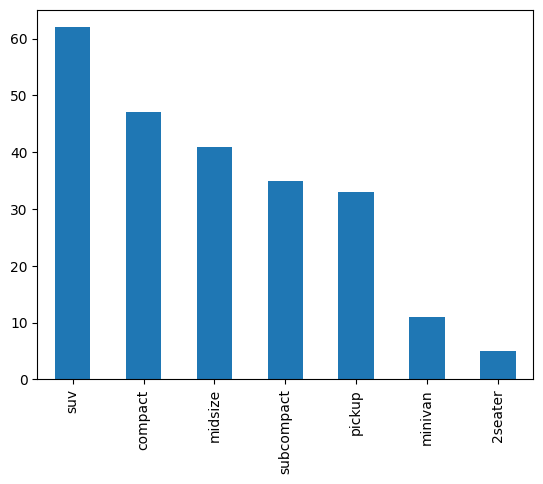

In [7]:
# 2) cate_cnt를 막대그래프로 비교
cate_plot = cate_cnt.plot.bar()

# 결론: SUV 카테고리의 값이 가장 크다.

In [8]:
# 질문 3번: 연비가 가장 좋은 차의 연비는?
mpg[['hwy']].max()     # max(): 최댓값 추출

hwy    44
dtype: int64

In [9]:
# 질문 4번: 폭스바겐의 요약통계량은?
mpg.query('manufacturer == "volkswagen"').describe() # 요약통계량 출력 함수인 describe() 이용해 출력

,displ,year,cyl,cty,hwy
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.255556,2002.666667,4.592593,20.925926,29.222222
std,0.443182,4.506406,0.843949,4.556702,5.315676
min,1.800000,1999.000000,4.000000,16.000000,23.000000
25%,2.000000,1999.000000,4.000000,18.500000,26.000000
50%,2.000000,1999.000000,4.000000,21.000000,29.000000
75%,2.500000,2008.000000,5.000000,21.000000,29.000000
max,3.600000,2008.000000,6.000000,35.000000,44.000000


In [10]:
# 질문 5번: 아우디 차 중에서 2000년 이전에 생산되고 연비가 20이 넘는 차량은?
# query를 이용해 조건 부여
mpg.query('manufacturer == "audi" & year < 2000 & hwy > 20')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
11,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize


In [11]:
# 질문 6번: 연료 종류가 p가 아닌 제조사별 차량의 수는?
# query를 이용해 조건 부여 -> groupby로 manufacturer 컬럼을 기준으로 잡음. -> 모델 수 세기
mpg.query('fl != "p"').groupby('manufacturer').count()['model']

manufacturer
chevrolet     14
dodge         37
ford          24
honda          7
hyundai       14
jeep           7
land rover     2
lincoln        2
mercury        4
nissan         8
pontiac        3
subaru        10
toyota        34
volkswagen    16
Name: model, dtype: int64

In [12]:
# 질문 7번: 배기량의 평균 수치는?
# mean()으로 displ 컬럼의 평균 구하기
displ_mean = mpg['displ'].mean()
displ_mean

3.4717948717948723

In [13]:
# 질문 8번: 배기량이 높은 차와 낮은 차의 각각의 차량 수는?
# 질문 7번에서 구한 평균을 기준으로, 평균보다 낮은 값은 worse, 평균보다 높은 값은 better로 출력하기
mpg['function'] = np.where(mpg['displ'] < displ_mean, 'worse', 'better')
mpg['function'].value_counts()

worse     127
better    107
Name: function, dtype: int64